# Student tests
Assume, that data is distributed **normally**, need to check it before applying tests!

### 1-sample test

$H_0\colon$ $\hat{\mu} = \mu_0$.

$H_1\colon$ $\hat{\mu} \neq \mu_0.$

**z-test**
$$Z(X_n)=\frac{\overline{X}_n-\mu_0}{\sigma/\sqrt{n}} \sim N(0,1)$$

**t-test**
$$T(X_n)=\frac{\overline{X}_n-\mu_0}{S/\sqrt{n}} \sim St(n-1),$$

where $S$ - sample standard deviation

In [12]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import *

data = pd.read_csv('data/ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

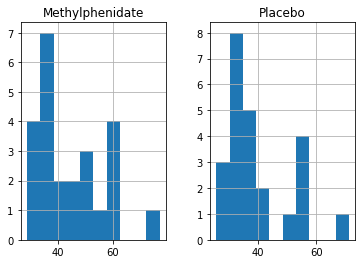

In [13]:
data.hist();

In [14]:
mu_0 = 50

stats.ttest_1samp(data.Placebo, mu_0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [15]:
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


### 1-sample test wo full samples

$H_0\colon$ $\hat{\mu} = \mu_0$.

$H_1\colon$ $\hat{\mu} \neq \mu_0.$

In [22]:
mu_0 = 525
mu_exp = 541.4

#std deviation
std = 100
N = 100

## Calculate the statistics
z = (mu_exp - mu_0)/(std / np.sqrt(N))

In [23]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [24]:
proportions_diff_z_test(z)

0.10100516694820794

### 2-sample test (independent samples)

$H_0\colon$ $\mu_1 = \mu_2$.

$H_1\colon$ $\mu_1\neq \mu_2.$


**z-test**
$$Z(X_1^{n_1}, X_2^{n_2})=\frac{\overline{X}_1-\overline{X}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} \sim N(0,1),$$

**t-test**
$$T(X_1^{n_1}, X_2^{n_2})=\frac{\overline{X}_1-\overline{X}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}} \approx \sim St(\nu),$$

$$\nu = \frac{\left(\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} \right)^2}{ \frac{S_1^4}{n_1^2(n_1-1)} + \frac{S_2^4}{n_2^2(n_2-1)} }$$


where $S_1, S_2$ - sample standard deviation for samples 1 and 2 relatively.

*Note*: does not have an exact solution (Behrens–Fisher problem). Works when $n_1>n_2 = \sigma_1 > \sigma_2$.

In [18]:
stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [20]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


### 2-sample test (dependent samples)

$H_0\colon$ $\mu_1 = \mu_2$.

$H_1\colon$ $\mu_1\neq \mu_2.$

**t-test**
$$T(X_n)=\frac{\overline{X}_1-\overline{X}_2}{S/\sqrt{n}} \sim St(n-1),$$

$$S^2 = \frac{1}{n-1}\sum\limits_{i=1}^{n}(D_i-\overline{D})^2,$$
$$D_i = (x_{1i} - x_{2i})$$

In [19]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [21]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]
